# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


### Generate the Cities List by Using the `citipy` Library

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Convert the temperature from Kelvin to Celsius
        city_max_temp = city_max_temp - 273.15
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | gondia
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | nurlat
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | tamazulapam villa del progreso
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | bikenibeu village
Processing Record 13 of Set 1 | la foa
Processing Record 14 of Set 1 | ponta delgada
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | pulandian
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | freistadt
Processing Record 

Processing Record 40 of Set 4 | yairipok
Processing Record 41 of Set 4 | mili
Processing Record 42 of Set 4 | gaillac
Processing Record 43 of Set 4 | vaasa
Processing Record 44 of Set 4 | minot air force base
Processing Record 45 of Set 4 | newman
Processing Record 46 of Set 4 | carutapera
Processing Record 47 of Set 4 | pitimbu
Processing Record 48 of Set 4 | thunder bay
Processing Record 49 of Set 4 | noumea
Processing Record 0 of Set 5 | aspen
Processing Record 1 of Set 5 | tejen
Processing Record 2 of Set 5 | pocinhos
Processing Record 3 of Set 5 | mabaruma
Processing Record 4 of Set 5 | calvinia
Processing Record 5 of Set 5 | rawson
Processing Record 6 of Set 5 | jabor
Processing Record 7 of Set 5 | kayangel
Processing Record 8 of Set 5 | dudinka
Processing Record 9 of Set 5 | maumere
Processing Record 10 of Set 5 | verkhnevilyuysk
Processing Record 11 of Set 5 | greymouth
Processing Record 12 of Set 5 | madang
Processing Record 13 of Set 5 | la ronge
Processing Record 14 of Set 5

Processing Record 30 of Set 8 | tobelo
Processing Record 31 of Set 8 | susuman
Processing Record 32 of Set 8 | hastings
Processing Record 33 of Set 8 | darab
Processing Record 34 of Set 8 | we
City not found. Skipping...
Processing Record 35 of Set 8 | tadine
Processing Record 36 of Set 8 | bandraboua
Processing Record 37 of Set 8 | stuttgart
Processing Record 38 of Set 8 | san antonio de pale
Processing Record 39 of Set 8 | bejubang dua
City not found. Skipping...
Processing Record 40 of Set 8 | narasapur
Processing Record 41 of Set 8 | al burayqah
Processing Record 42 of Set 8 | altai
Processing Record 43 of Set 8 | asheboro
Processing Record 44 of Set 8 | deutschlandsberg
Processing Record 45 of Set 8 | vanino
Processing Record 46 of Set 8 | karratha
Processing Record 47 of Set 8 | santa elena de uairen
Processing Record 48 of Set 8 | gwaram
Processing Record 49 of Set 8 | kuching
Processing Record 0 of Set 9 | genhe
Processing Record 1 of Set 9 | qurayyat
Processing Record 2 of Set

Processing Record 17 of Set 12 | pineville
Processing Record 18 of Set 12 | butte
Processing Record 19 of Set 12 | tshabong
Processing Record 20 of Set 12 | loen
Processing Record 21 of Set 12 | san-pedro
Processing Record 22 of Set 12 | madimba
Processing Record 23 of Set 12 | ivdel'
Processing Record 24 of Set 12 | almeria
Processing Record 25 of Set 12 | avanigadda
Processing Record 26 of Set 12 | wegorzewo
Processing Record 27 of Set 12 | darovskoy
Processing Record 28 of Set 12 | maua
Processing Record 29 of Set 12 | prince rupert
Processing Record 30 of Set 12 | kolonia
Processing Record 31 of Set 12 | saint helier
Processing Record 32 of Set 12 | nova vicosa
Processing Record 33 of Set 12 | ayorou
Processing Record 34 of Set 12 | salym
Processing Record 35 of Set 12 | bel ombre
Processing Record 36 of Set 12 | chui
Processing Record 37 of Set 12 | puerto palomas
Processing Record 38 of Set 12 | guarapari
Processing Record 39 of Set 12 | ghadamis
Processing Record 40 of Set 12 | 

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,12.41,68,99,17.76,SH,1699064089
1,ancud,-41.8697,-73.8203,8.85,89,100,2.39,CL,1699064091
2,gondia,21.4500,80.2000,20.67,61,0,1.36,IN,1699064092
3,adamstown,-25.0660,-130.1015,22.89,76,100,5.15,PN,1699064092
4,nurlat,54.4277,50.8051,0.42,82,6,1.85,RU,1699064048


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/Sam/Desktop/MY_UC_BERK/CHALLENGES/CHALLENGE_6/output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("/Users/Sam/Desktop/MY_UC_BERK/CHALLENGES/CHALLENGE_6/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.41,68,99,17.76,SH,1699064089
1,ancud,-41.8697,-73.8203,8.85,89,100,2.39,CL,1699064091
2,gondia,21.4500,80.2000,20.67,61,0,1.36,IN,1699064092
3,adamstown,-25.0660,-130.1015,22.89,76,100,5.15,PN,1699064092
4,nurlat,54.4277,50.8051,0.42,82,6,1.85,RU,1699064048


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

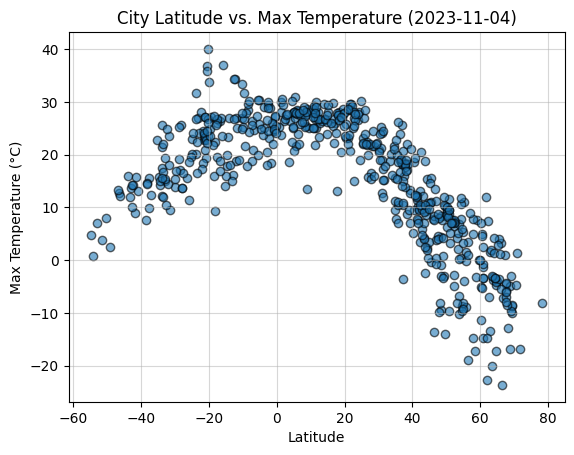

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.6)

# Incorporate the other graph properties
timestamp = city_data_df.loc[0, "Date"]
date = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d')

# Incorporate the timestamp into the scatter plot title
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("/Users/Sam/Desktop/MY_UC_BERK/CHALLENGES/CHALLENGE_6/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

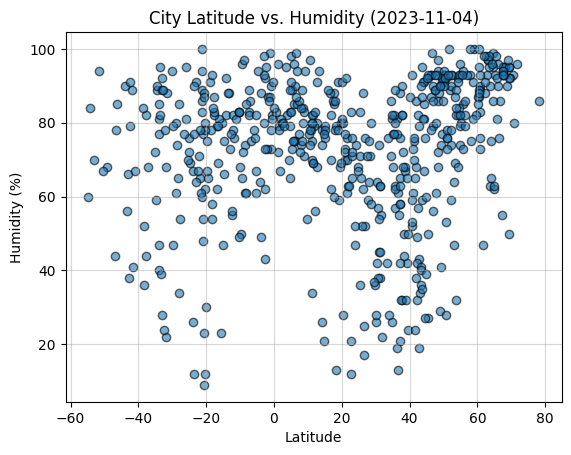

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.6)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("/Users/Sam/Desktop/MY_UC_BERK/CHALLENGES/CHALLENGE_6/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

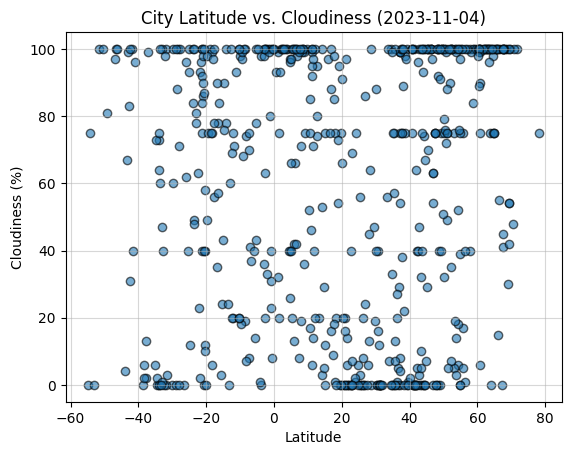

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.6)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("/Users/Sam/Desktop/MY_UC_BERK/CHALLENGES/CHALLENGE_6/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

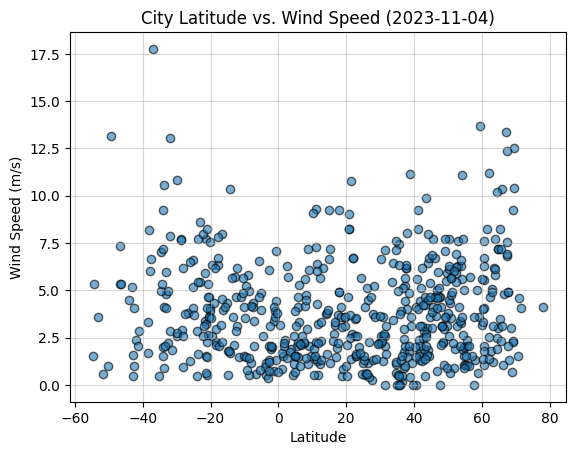

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.6)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("/Users/Sam/Desktop/MY_UC_BERK/CHALLENGES/CHALLENGE_6/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def lin_gress (x_data, y_data, x_label, y_label, title, file_name):
    # Create the scatter plot
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.6)

    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept

    # Create the regression line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add the regression line to the plot
    plt.plot(x_data, regress_values, "r-")
    plt.annotate(line_eq, (x_data.min(), y_data.min()), fontsize=12, color="red")

    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Save the figure to output data file
    plt.savefig("/Users/Sam/Desktop/MY_UC_BERK/CHALLENGES/CHALLENGE_6/output_data/" + file_name)
    
    print("The r-value is: ",r_value)

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,gondia,21.4500,80.2000,20.67,61,0,1.36,IN,1699064092
4,nurlat,54.4277,50.8051,0.42,82,6,1.85,RU,1699064048
5,isafjordur,66.0755,-23.1240,3.20,90,100,10.35,IS,1699064094
9,tamazulapam villa del progreso,17.6806,-97.5689,13.16,85,85,3.71,MX,1699064096
10,iqaluit,63.7506,-68.5145,-3.15,63,75,6.17,CA,1699064097


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.41,68,99,17.76,SH,1699064089
1,ancud,-41.8697,-73.8203,8.85,89,100,2.39,CL,1699064091
3,adamstown,-25.0660,-130.1015,22.89,76,100,5.15,PN,1699064092
6,lebu,-37.6167,-73.6500,9.97,82,2,6.68,CL,1699064094
7,grytviken,-54.2811,-36.5092,0.78,84,75,5.31,GS,1699064095


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.8792858166736318


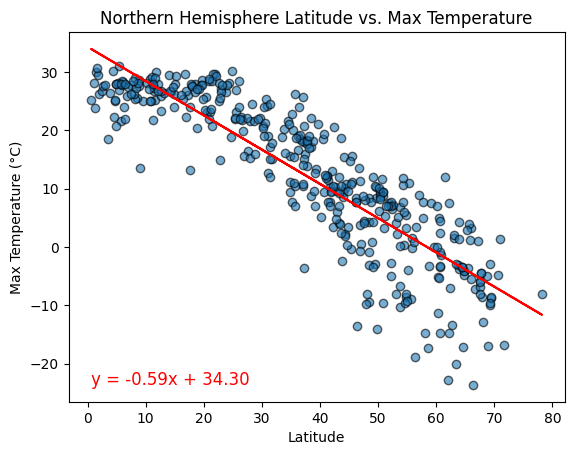

In [88]:
# Linear regression on Northern Hemisphere
lin_gress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", 
          "Northern Hemisphere Latitude vs. Max Temperature", "north_temp")

The r-value is:  0.6779111779191922


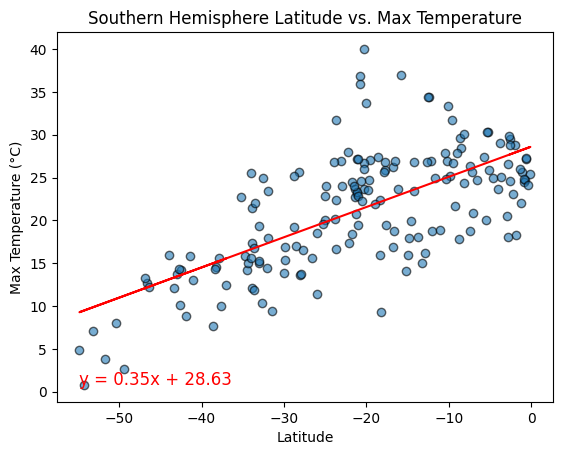

In [89]:
# Linear regression on Southern Hemisphere
lin_gress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", 
          "Southern Hemisphere Latitude vs. Max Temperature", "south_temp")


**Discussion about the linear relationship:** By separating the city data by hemisphere, we are able to look more closely at the possible correlation between a city's latitude and its max temperature. Based on the two graphs displayed, we are able to determine that there is a correlation between the two factors. For the Northern hemisphere, there is a fairly strong negative correlation while the Southern hemisphere displays a somewhat strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.17927913183351316


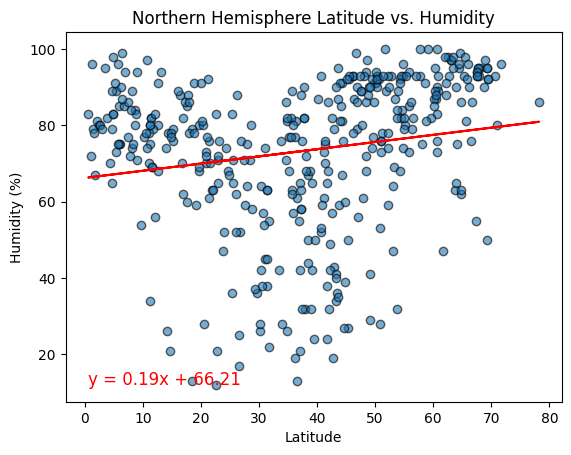

In [90]:
# Northern Hemisphere
lin_gress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", 
          "Northern Hemisphere Latitude vs. Humidity", "north_humid")

The r-value is:  0.18372882021481615


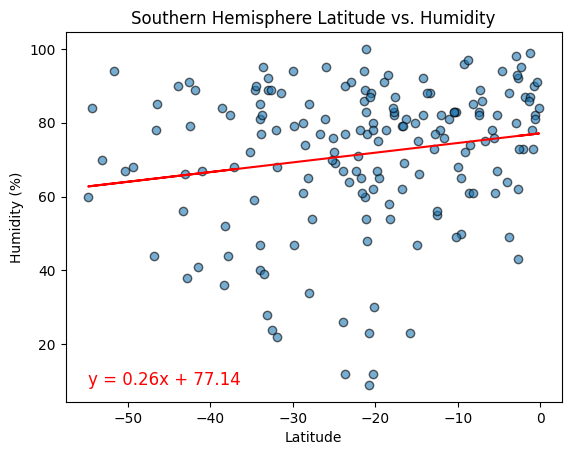

In [91]:
# Southern Hemisphere
lin_gress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", 
          "Southern Hemisphere Latitude vs. Humidity", "south_humid")

**Discussion about the linear relationship:** When testing the relationship between a city's latitude measurement and its humidity, there seems to be little to no correlation for both the Northern and Southern hemisphere cities.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.17489806514374445


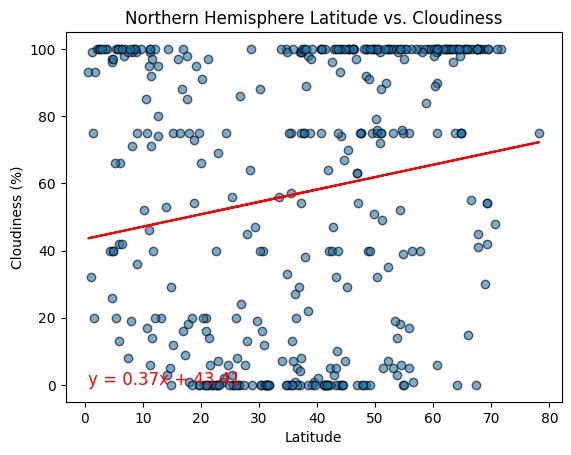

In [92]:
# Northern Hemisphere
lin_gress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", 
          "Northern Hemisphere Latitude vs. Cloudiness", "north_cloud")

The r-value is:  0.09409758537269529


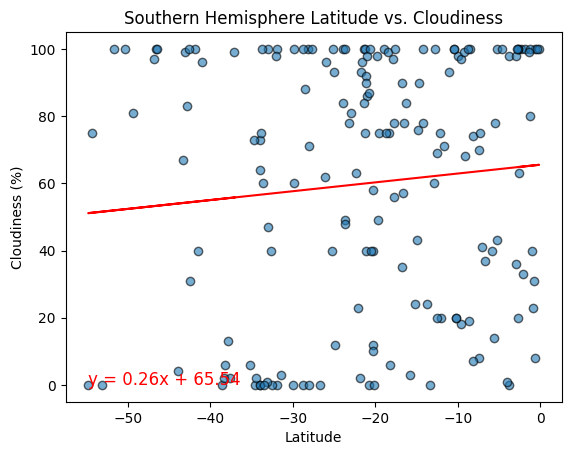

In [93]:
# Southern Hemisphere
lin_gress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", 
          "Southern Hemisphere Latitude vs. Cloudiness", "south_cloud")

**Discussion about the linear relationship:** Similarly to humidity, when testing the relationship between a city's latitude measurement and its cloudiness, there seems to be little to no correlation for both the Northern and Southern hemisphere cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.224263769012737


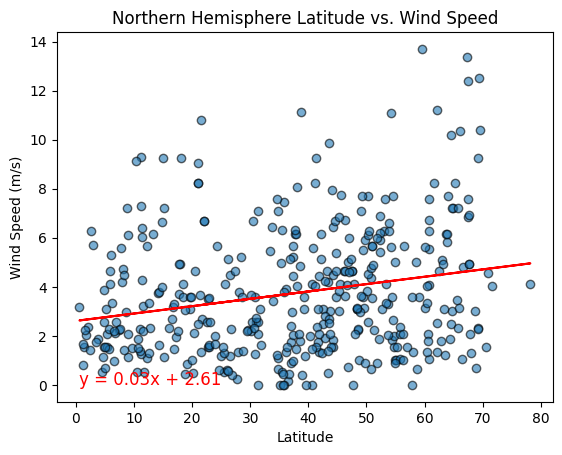

In [94]:
# Northern Hemisphere
lin_gress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", 
          "Northern Hemisphere Latitude vs. Wind Speed", "north_wind")

The r-value is:  -0.22166056488609748


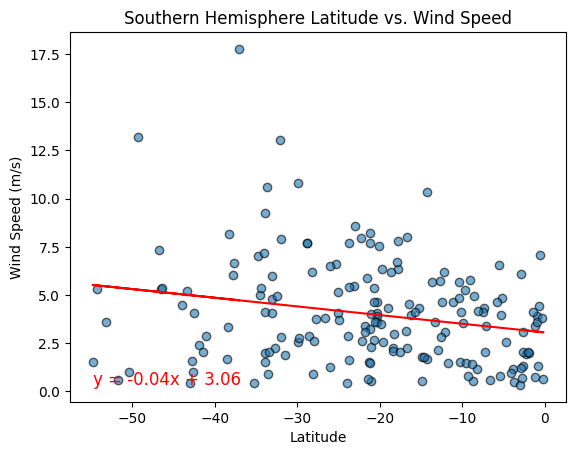

In [95]:
# Southern Hemisphere
lin_gress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", 
          "Southern Hemisphere Latitude vs. Wind Speed", "south_wind")

**Discussion about the linear relationship:** When testing the relationship between a city's latitude measurement and its wind speed, there seems to be little to no correlation for both the Northern and Southern hemisphere. The Northern hemisphere seems to have a very slight positive correlation while the Southern hemisphere seems to have a very slight negative correlation.